# How to Construct a CNN Model

출처: https://github.com/Harry24k/Pytorch-Basic



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

CNN은 convolution layer를 사용해 filter 연산을 함.
![ICLH_Diagram_Batch_02_17A-ConvolutionalNeuralNetworks-WHITEBG[1].png](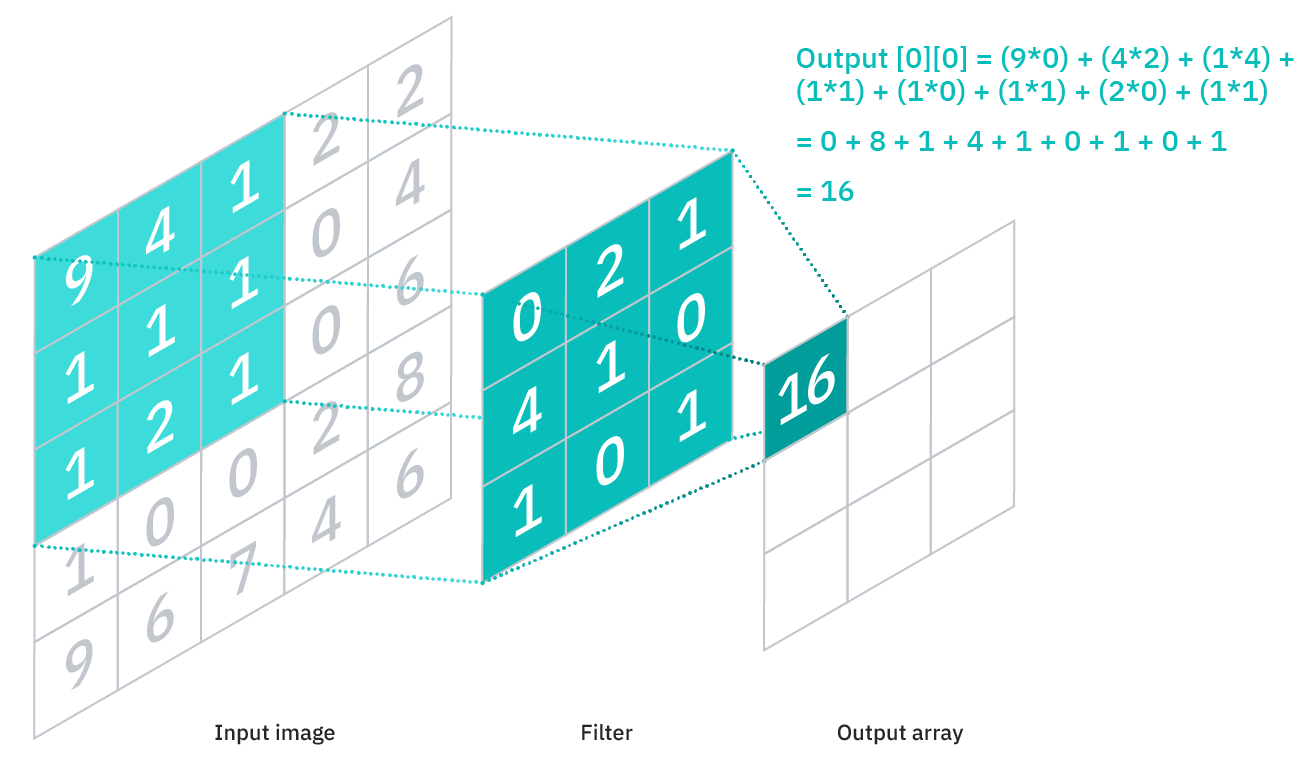)

출처: https://www.ibm.com/cloud/learn/convolutional-neural-networks

- CNN 모델은 일반적으로 covolution과 pooling layer로 구성되어 있음(보통 그 사이에 ReLU layer을 넣지만, 최근 연구결과 순서를 바꿔도 됨이 밝혀짐)
- filter을 이용해 연산을 하면 크기가 줄어듦, padding을 통해 이를 해결할 수 있음.
- pooling을 통해 중요한 정보만 남게 할 수 있음. 보통 max pooling을 사용하며, 예를들어 2*2 max pooling을 하면 크기는 반으로 줄어듦.
- stride를 통해 건너뛰면서 연산을 할 수도 있음.


- input : N * N
- padding : P
- stride : S
- Filter : F * F

라고 할 때,

### output = {[(N+2P-F)/S] + 1} * {[(N+2P-F)/S] + 1} 
여기서 []는 가우스기호

직접 계산을 해 봅시다!

빈칸을 모두 채워서 실행 결과가 True가 나오는 파일 제출하기

In [ ]:
X = torch.rand(100, 1, 28, 28)
Y = torch.rand(100, 1, 24, 24)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 1, 5)  # in_channels, out_channels, kernel_size) stride=1, padding=0)   N -> F -> ?  N-F+1개  28 - ? +1 = 24
)

model(X).shape == Y.shape

True

In [ ]:
X = torch.rand(100, 1, 28, 28)
Y = torch.rand(100, 3, 28, 28)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 3, 1),
)

model(X).shape == Y.shape

True

In [ ]:
X = torch.rand(100, 1, 28, 28)
Y = torch.rand(100, 1, 30, 30)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 1, 1, padding=1),   # padding=1은 위아래 하나씩이라 2개 추가
 )

model(X).shape == Y.shape

False

In [ ]:
X = torch.rand(100, 1, 28, 28)
Y = torch.rand(100, 1, 20, 20)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 1, 5),  ## (100,1,24,24)
    nn.ReLU(),
    nn.Conv2d(1, 1, 5), # 24 - ? +1=20
)

model(X).shape == Y.shape

True

In [ ]:
X = torch.rand(100, 1, 28, 28)
Y = torch.rand(100, 10, 22, 22)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 3, 5),   # (100, 3, 24,24)
    nn.ReLU(), # 크기에는 영향 X
    nn.Conv2d(3, 10, 3),   #(100, 10, 22,22)
)

model(X).shape == Y.shape

True

In [ ]:
X = torch.rand(100, 1, 28, 28)
Y = torch.rand(100, 32, 26, 26)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 4, 4, padding=2), # (100, 4, 29, 29)   28 + 4(padding) + 4 -4 +1
    nn.ReLU(),
    nn.Conv2d(4, 32, 4), # 29 -?  +1=26
)

model(X).shape == Y.shape

True

In [ ]:
X = torch.rand(100, 1, 28, 28)
Y = torch.rand(100, 64, 19, 19)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 4, 4), # (100, 4, 25,25)
    nn.ReLU(),
    nn.Conv2d(4, 32, 4), # (100, 32, 22, 22) 
    nn.ReLU(),
    nn.Conv2d(32, 64,4), # ()
)

model(X).shape == Y.shape

True

In [ ]:
X = torch.rand(100, 1, 28, 28)
Y = torch.rand(100, 64, 8, 8)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 4, 4), # (100, 4, 25, 25)
    nn.ReLU(),
    nn.Conv2d(4, 32, 4, stride=2),  # before stride(100, 32, 22,22 )  25-4+1=22/Stride=2  (100, 32, 11, 11)
    nn.ReLU(),
    nn.Conv2d(32, 64, 4),  #  (100, 64, 8, 8) 역으로 계산,
)

model(X).shape == Y.shape

True

In [ ]:
X = torch.rand(100, 1, 28, 28)
Y = torch.rand(100, 64, 8, 8)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 4, 4),   # (100, 4, 25, 25)
    nn.ReLU(),
    nn.Conv2d(4, 32, 4),  # (100, 32, 22, 22)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),   # (kernel_size, stride) (100, 32, 11, 11) pooling은 배치, 채널수는 보존, 
    nn.Conv2d(32, 64, 4),  # (100, 64, 8, 8) +>역으로 ㅢ 위에 값
)

model(X).shape == Y.shape

True

In [ ]:
X = torch.rand(100, 1, 28, 28)
Y = torch.rand(100, 64, 3, 3)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 16, 5), # (100, 16, 24, 24)
    nn.ReLU(),
    nn.Conv2d(16, 32, 5), # (100, 32, 20, 20)
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # (100, 32, 10, 10)
    nn.Conv2d(32, 64, 5),
    nn.ReLU(),          # !(100, 64, 6, 6)
    nn.MaxPool2d(2, 2)  # (100, 64, 3, 3)
)

model(X).shape == Y.shape

True